<a href="https://colab.research.google.com/github/SuvarnaDalin/TSF---GRIP/blob/master/Task_4_Exploring_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Task # 4 - Explore Decision Tree Algorithm**

**Objective**:
For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

Data can be found at https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing


> **Problem Statement**: 
Predict the class of a new data fed to the Decision tree classifier correctly.


In [1]:
# Installing libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
!git clone https://github.com/SuvarnaDalin/Data-for-Analysis.git

fatal: destination path 'Data-for-Analysis' already exists and is not an empty directory.


In [4]:
!ls Data-for-Analysis/

Iris.csv  README.md


In [5]:
iris_data = pd.read_csv('Data-for-Analysis/Iris.csv')
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


**Splitting data in to X & Y**

In [6]:
feature_cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X = iris_data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# Apply label encoder to "Species" column with categorical data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris_data["Species"])

**2D View of iris data**

Text(0.5, 1.0, 'Scatter plot of iris data')

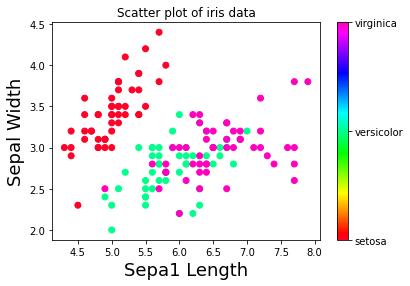

In [7]:
y_names = ['setosa', 'versicolor', 'virginica']
formatter = plt.FuncFormatter(lambda i, *args: y_names[int(i)])
fig, ax = plt.subplots() 

y_plot = plt.scatter(X["SepalLengthCm"], X["SepalWidthCm"], c = y, cmap='gist_rainbow', label = y)
fig.colorbar(y_plot, ticks=[0, 1, 2], format=formatter)
plt.xlabel('Sepa1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.title("Scatter plot of iris data")

**Applying Decision Tree Classifier on the whole iris data**

In [8]:
clf = DecisionTreeClassifier(random_state = 0)
dt = clf.fit(X, y)
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [9]:
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True, feature_names = feature_cols, class_names = y_names)
graphs = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphs.write_png('iris_flower_class.png')

True

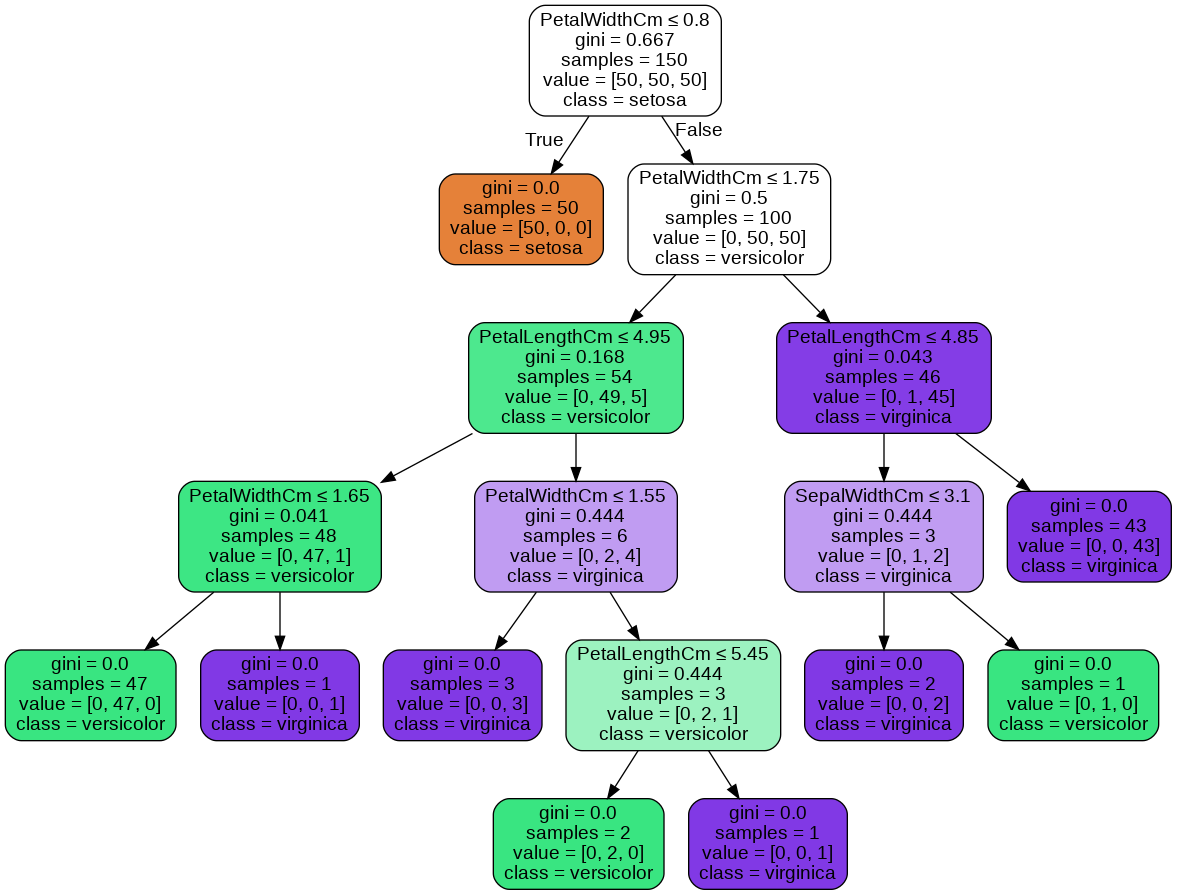

In [10]:
Image(graphs.create_png())

The above classifier have classified the whole Iris data containing 150 samples in to 2 samples of class "versicolor" and 1 sample of class "virginia", based on the flower features such as sepal length, sepal width, petal length, and petal width. SO according to this classifier the classes "versicolor" and "virginia" are the prominent classes among the 3 classes.

**Applying Decision Tree Classifier on a portion of the data to make class predictions on a newly added set of data**

In [11]:
# Splitting data in to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Train the Decision Tree model on the data for a tree_depth = 2

The model is learning the relationship between X(sepal length, sepal width, petal length, and petal width) and y(species of iris)

In [12]:
# Randomly selecting maximum depth of the tree = 2 so as to prune the tree
# A pruned model performs better
clf1 = DecisionTreeClassifier(max_depth = 2, random_state = 0)
dt1 = clf1.fit(X_train, y_train)
dt1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Making prediction based on the trained data for a tree_depth  = 2

A prediction is just the majority class of the instances in a leaf node.

In [13]:
y_pred = clf1.predict(X_test)

In [14]:
# Checking for accuracy of the model for tree_depth = 2
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


**Tuning the depth of the tree for better accuracy**

In [15]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 7))# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
  CLF = DecisionTreeClassifier(max_depth = depth, random_state = 0)
  CLF.fit(X_train, y_train)
  y_pred = CLF.predict(X_test)
  score = metrics.accuracy_score(y_test, y_pred)
  print("Max tree depth: %d  \t\t Accuracy:  %f" %(depth, score))
  accuracy.append(score)

Max tree depth: 1  		 Accuracy:  0.684211
Max tree depth: 2  		 Accuracy:  0.973684
Max tree depth: 3  		 Accuracy:  1.000000
Max tree depth: 4  		 Accuracy:  1.000000
Max tree depth: 5  		 Accuracy:  1.000000
Max tree depth: 6  		 Accuracy:  1.000000


From the tree depth tuning method it can be seen that a tree_depth of 3 and above produces the best accuracy.

**Training the Data**

In [16]:
clf2 = DecisionTreeClassifier(max_depth = 6, random_state = 0)
dt2 = clf2.fit(X_train, y_train)
dt2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Visualizing the Decision Tree Model**

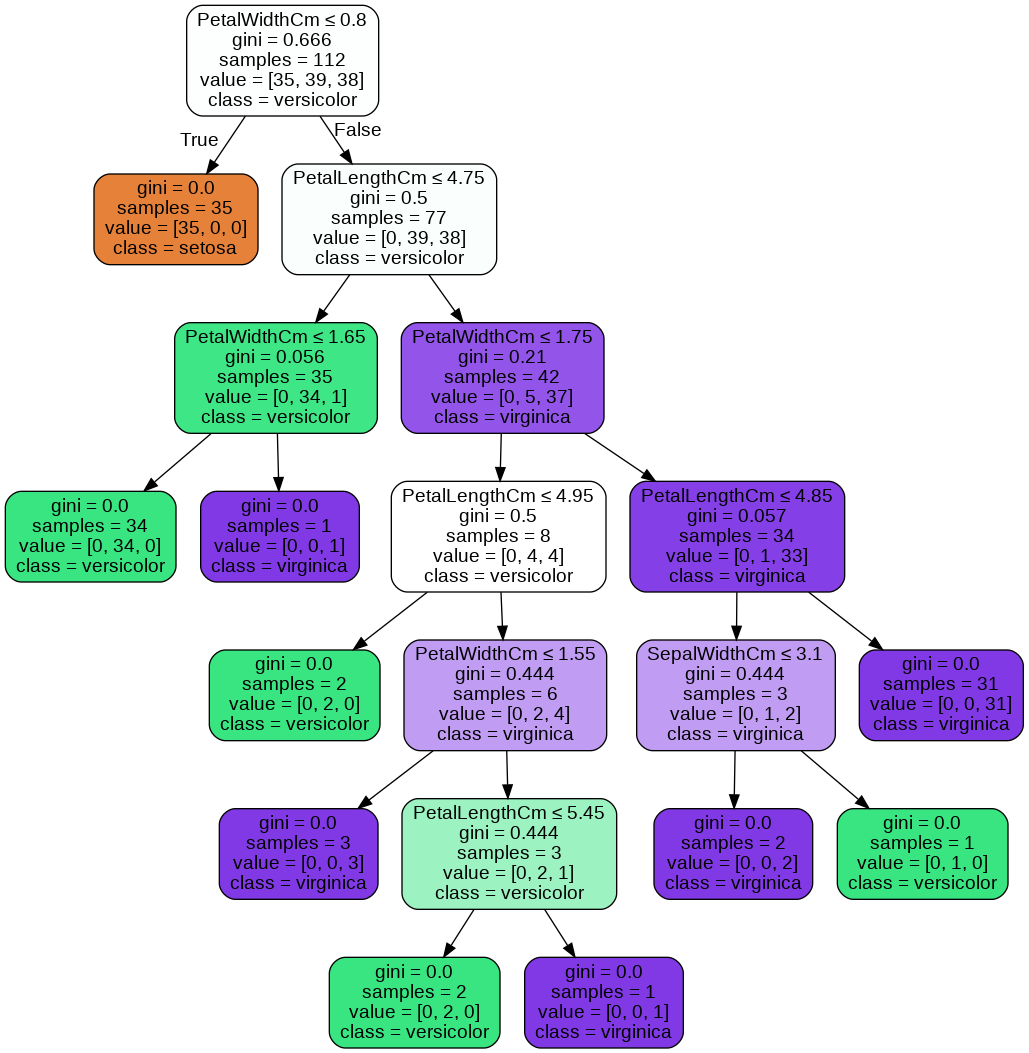

In [17]:
dot_data = StringIO()
export_graphviz(dt2, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True, feature_names = feature_cols, class_names = y_names)
graphs = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphs.write_png('iris_flower_class.png')
Image(graphs.create_png())

The Decision Tree model has again stressed importance to the classes "versicolor" and "virginica" and the class "setosa" has been neglected at level 1 itself.

**Feature Importance**

In [18]:
f_imp = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(clf2.feature_importances_,3)})
f_imp = f_imp.sort_values('Importance')
f_imp

,Feature,Importance
0,SepalLengthCm,0.000
1,SepalWidthCm,0.018
2,PetalLengthCm,0.416
3,PetalWidthCm,0.566


In the example above (for a particular train test split of iris), the petal width has the highest feature importance weight. We can confirm by looking at the corresponding decision tree. Sepal Length is not being used at all for the classsification process and sepal width is used only in one instance.

**Making Predictions on the new to be tested data**

In [19]:
y_pred = clf2.predict(X_test)

In [20]:
# Checking for accuracy of the model for tree_depth = 6
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


It is found that the predictions made from the above decision tree classifier has produced an accuracy rate of 1. So the class predictions made from this classifier will be very accurate.